# Programmation dynamique

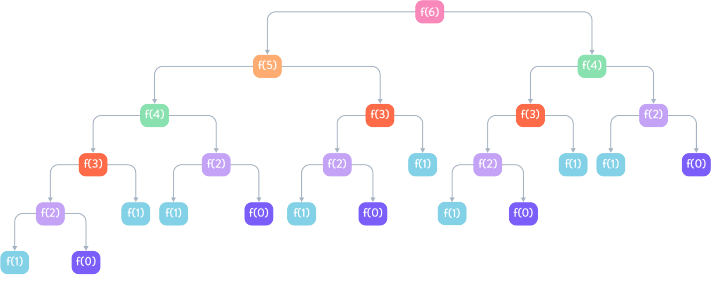

---
## Retour sur la suite de Fibonacci

### Rappel

Comme nous l'avons déjà vu en fin de cours ___Fonctionnement d'un programme récursif___, la suite de Fibonacci se définit ainsi :  

$$fibo(n) = \left\{ \begin {array} {ll} 1~si~n~=~0 \\ 1~si~n~=~1 \\ fibo(n-1) + fibo(n-2)~si~n~>~1 \end{array}\right.$$


### Implémentation

Nous avions programmé la version récursive de la suite :

In [ ]:
# à exécuter

# Version récursive
def fiboR(n):
    if n==0 :
        return 1
    elif n==1:
        return 1
    return fiboR(n-1)+fiboR(n-2)


### Exécution et performance
Etudions maintenant les performances de notre version récursive en calculant $fibo(35)$

In [ ]:
# à exécuter

from timeit import default_timer as timer
# Nombre d'éléments de la liste
nb=35

# Démarrage du chrono
debut_chrono = timer()
# Lancement de la version récursive
print ("Version Récursive : ",fiboR(nb), end=" - ")
# Fin du chrono et calcul de la durée
fin_chrono = timer()
duree = fin_chrono - debut_chrono
# Affichage du résultat
print(1000*duree,"ms")


> **⚠️ L'algorithme récursif de la suite de Fibonacci est très simple à comprendre et à implémenter mais très peu performant.**

### Analyse

Dessinons l'arbre des appels récursifs de $fibo(4)$ :


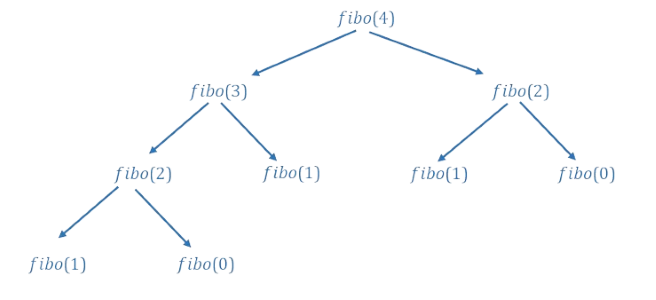

---
### 💻 EXERCICE 1
> - Dessinez à votre tour l'arbre des appels de $fibo(6)$

> - Combien d'appels récursifs sont effectués ?

> - Combien de fois est appelée récursivement $fibo(2)$ ?

Pour résoudre notre problème, nous l'avons divisé en problèmes plus petits, mais malheureusement pas indépendants : on dit que les problèmes se recouvrent, ce qui nous amène à refaire des choses déjà faites.  

### Vers une solution plus efficace

Pour optimiser notre calcul, nous aurions pu mémoriser le résultat du calcul de $fibo(2)$ et le réutiliser à chaque fois que nécessaire. C'est ce principe que nous allons appliquer :

Nous allons stocker le résultat de chaque calcul dans un dictionnaire. Ainsi, à chaque demande de calcul :
- Soit le calcul a déjà été effectué : on a donc juste à le lire dans le dictionnaire.
- Soit le calcul n'a jamais été effectué : on l'effectue, et on stocke le résultat dans le dictionnaire.

---
### 💻 EXERCICE 2
> - Complétez les pointillés pour implémenter l'algorithme optimisé de la suite de Fibonacci

In [ ]:
# à compléter

# Création du dictionnaire avec les deux premers éléments
dict_fibo = {0:1, 1:1}

# Fonction récursive
def fibo(n):
    if n in dict_fibo:
        return ...
    dict_fibo[n] = ... + ...
    return ...

In [ ]:
# Vérification : doit renvoyer 14930352
fibo(35)

> - Mesurons le temps de calcul de $fibo(35)$ avec ce nouvel algorithme

In [ ]:
# à exécuter

from timeit import default_timer as timer
# Nombre d'éléments de la liste
nb=35

# Démarrage du chrono
debut_chrono = timer()
# Lancement de la version récursive
print ("Version Optimisée : ",fibo(nb), end=" - ")
# Fin du chrono et calcul de la durée
fin_chrono = timer()
duree = fin_chrono - debut_chrono
# Affichage du résultat
print(1000*duree,"ms")


Notre technique ne change pas vraiment la structure du programme : on continue de calculer toutes les valeurs intermédiaires, mais on ne les calcule qu'une seule fois.

> 📌 Cette technique d'optimisation de code consistant à réduire le temps d'exécution d'une fonction en mémorisant ses résultats d'une fois à l'autre est appelée **mémoïsation**.

### Suppression de la variable globale

Vous aviez peut-être remarqué que cette méthode est très efficace mais comporte un problème de conception car la fonction `fibo(n)` utilise un dictionnaire extérieur à celle-ci, autrement-dit une **variable globale**.  
Comme nous l'avons vu dans le chapitre ___paradigmes de programmation___ ceci n'est pas recommandé et peut entrainer des **effets de bord**.  

Il est possible de supprimer cet effet en "englobant" notre fonction dans une autre qui initialisera le dictionnaire et appellera notre fonction `fibo(n)`.

---
### 💻 EXERCICE 3
> - Insérez votre fonction $fibo(n)$ de l'_Exercice 2_ au bon endroit et correctement indentée

In [ ]:
# à compléter

# Fonction englobante
def fibonacci(n):
    dict_fibo = {0:1, 1:1}
    
    # Insérez ici votre fonction récursive en l'indentant correctement


    # Appel de la fonction récursive
    return fibo(n)


In [ ]:
# Vérification : doit renvoyer 14930352
fibonacci(35)

> 💡_Vous remarquerez la définition d'une fonction à l'intérieur d'une autre. Cela ne pose aucun problème, mais attention, cette fonction n'existe pas à l'extérieur de sa fonction englobante._

### Une approche du "bas vers le haut"

La structure récursive naturelle de la suite de Fibonacci nous a conduit vers un programme qui calcule les valeurs de la plus grande ($n$) vers la plus petite ($1$ ou $0$) autrement dit de haut en bas ou **top-down**.  

Il est cependant possible de calculer une valeur de manière itérative en commençant par la valeur $fibo(2)$ puis $fibo(3)$ et ainsi de suite jusqu'à la valeur attendue.  

Cette approche du bas vers le haut est également appelée **bottom-up**.  




---
### 💻 EXERCICE 4
> - Complétez les pointillés pour implémenter l'algorithme optimisé de la suite de Fibonacci _bottom-up_

In [ ]:
# à compléter

def fiboB(n):
    dict_fibo = {}
    dict_fibo[0] = ...
    dict_fibo[1] = ...
    for k in range(..., ...):
        dict_fibo[k] = dict_fibo[...] + dict_fibo[...]
    return dict_fibo[...]

In [ ]:
# Vérification : doit renvoyer 14930352
fiboB(35)

> 💡_Vous remarquerez qu'ici, le dictionnaire est reconstruit à chaque appel, il n'est donc pas nécessaire d'englober la fonction dans une autre._

> - Mesurons le temps de calcul de $fibo(35)$ avec ce nouvel algorithme

In [ ]:
# à exe-écuter

from timeit import default_timer as timer
# Nombre d'éléments de la liste
nb=35

# Démarrage du chrono
debut_chrono = timer()
# Lancement de la version récursive
print ("Version Mémo bottom-up : ",fiboB(nb), end=" - ")
# Fin du chrono et calcul de la durée
fin_chrono = timer()
duree = fin_chrono - debut_chrono
# Affichage du résultat
print(1000*duree,"ms")


### 📌 Résumé : programmation dynamique
>  
> - Lors d'un calcul effectué de manière récursive, il peut arriver que de **multiples appels** soient identiques. Pour éviter de recalculer plusieurs fois la même chose, on peut **stocker** les résultats intermédiaires. On appelle cette technique la **mémoïsation**.  
>  
>- Cette méthode minimise le nombre d'opérations et accélère grandement l'exécution du programme mais elle nécessite l'utilisation d'une structure de stockage des valeurs intermédiaires, et donc une **augmentation de la mémoire** utilisée par le programme.  
>  
>- L'appel **récursif** décompose le problème en partant du haut vers le bas (**top-down**).
> 
>- Il est parfois plus simple de commencer par une «petite» version du problème pour progressivement remonter vers la solution du problème global de manière **itérative** (**bottom-up**).

